In [1]:
import requests
import sys
sys.path.append('../src/')
from TWIG_utils import *

In [2]:
api_key = "JeeOjlOPBe5aTiQ_Jb39raRqlam45uAO"
client = RESTClient(auth_key=api_key)

In [3]:
stock_data = read_csv_s3('twig-stockdata', 'sony_daily_stock_prices.csv')

In [12]:
ticker = "TSLA"
date='2023-05-01'

def ticker_news(ticker, api_key):
    url = f"https://api.polygon.io/v2/reference/news?ticker={ticker}&apiKey={api_key}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error: Request returned status code {response.status_code}")
    else:
        news_items = response.json()['results']

    return pd.DataFrame(news_items)

news = ticker_news(ticker, api_key)

# news

In [13]:
ticker_news = get_ticker_news(ticker, api_key, date)

ticker_news

,Titles,Description,Articles,Published,Source,URL,Tickers
0,Lear (LEA) Beats Q1 Earnings Estimates on Seat...,"Lear (LEA) puts up an impressive Q1 show, wher...",,2023-05-01T16:50:00Z,Zacks Equity Research,https://www.zacks.com/stock/news/2087615/lear-...,"[PCAR, GM, LEA, TSLA]"
1,Tesla Model Y Outsells Next 5 Closest Competit...,The Tesla Inc (NASDAQ: TSLA) Model Y (which re...,The Tesla Inc TSLA Model Y (which recently rec...,2023-05-01T16:30:14Z,Benzinga EV Insights,https://www.benzinga.com/news/23/05/32124452/t...,[TSLA]
2,"First Republic sinks after JPMorgan takeover, ...",JPMorgan Chase & Co. will take over First Repu...,These were the some of the most active stocks ...,2023-05-01T15:55:00Z,MarketWatch,https://www.marketwatch.com/story/first-republ...,"[JPM, ISEE, ON, NCLH, RCL, CCL, FCEL, XOM, Z, ..."
3,"NIO's April deliveries rise more than 30%, but...","NIO's stock rose Monday, along with the shares...","Shares of NIO Inc. traded lower Monday, revers...",2023-05-01T14:58:00Z,MarketWatch,https://www.marketwatch.com/story/nio-stock-ex...,"[NIO, MCHI, LI, XPEV, TSLA]"
4,4 Top Stocks to Buy in May and Put Away,"The markets are always looking forward, and yo...",Founded in 1993 by brothers Tom and David Gard...,2023-05-01T14:30:00Z,newsfeedback@fool.com (Neil Rozenbaum),https://www.fool.com/investing/2023/05/01/4-to...,"[AMZN, HD, GOOGL, TSLA, GOOG]"
5,Will Tesla Continue In This Trend Or Is A Gap ...,"Tesla, Inc (NASDAQ: TSLA) was trading flat in ...","Tesla, Inc TSLA was trading flat in the premar...",2023-05-01T13:58:00Z,Melanie Schaffer,https://www.benzinga.com/trading-ideas/long-id...,[TSLA]
6,"A volatile summer is coming as Fed pause, debt...",Onto our call of the day from the team at Ever...,May is kicking off with a deal for First Repub...,2023-05-01T12:28:00Z,MarketWatch,https://www.marketwatch.com/story/a-volatile-s...,"[XBI, QQQ, STX, BMRN, JPM, FRC, BRK.B, BRK.A, ..."
7,"Elon Musk and others may try, but controlling ...",Surely we can survive the advent of AI? Don’t ...,"As we’re constantly reminded, once something e...",2023-05-01T11:35:00Z,MarketWatch,https://www.marketwatch.com/story/elon-musk-an...,"[TSLA, AAPL, META, MSFT, GOOGL]"
8,S&P Records Second Straight Monthly Gain; Mark...,The S&P 500 closed higher on Friday following ...,The S&P 500 closed higher on Friday following ...,2023-05-01T10:07:45Z,Lisa Levin,https://www.benzinga.com/news/earnings/23/05/3...,"[INTC, NVDA, CVX, XOM, TSLA, FRC]"
9,"As Chevy nixes its Bolt EVs, there’s just one ...",This is the last year of production for the re...,The Chevy Bolt was America’s third best-sellin...,2023-05-01T09:01:00Z,MarketWatch,https://www.marketwatch.com/story/as-chevy-nix...,"[TSLA, GM]"


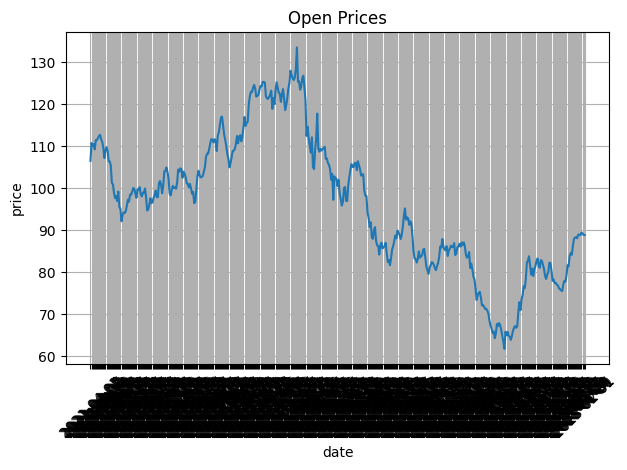

In [6]:
createPlot(xvalue=stock_data.date.values, yvalue=stock_data.open.values, xlabel="date", ylabel="price", title="Open Prices")